# documentation.functions

In [1]:
import os
os.chdir('..')

Here we present the documentation for the functions `QUAM.py`, contained in the module `quam` of the `qhdc` project.
```
qhdc
    |
    |_ quam
        |
        |_ QUAM.py
    |
    .
    .
    .  
```

## QUAM

The following functions are the building blocks for a "vanilla" quantum associative memory as introduced by Martinez and Ventura in [arxiv.org/abs/quant-ph/9807053](https://arxiv.org/abs/quant-ph/9807053). Here we show how to use the quantum associative memory (QuAM) for a simple pattern completion problem.

In [5]:
from quam import QUAM

### get_pattern
`get_pattern(n, s)`

Generates a bit string pattern.

**Args**
* `n` (int): Length of the pattern, corresponding to \( 2^n \) bits.
* `s` (int or str): The bit string pattern. If `s` is an integer, it is converted to a binary string; if `s` is already a string, it is returned as is.

**Returns**
* `str`: The generated bit string pattern.

### multi_phase_gate
`multi_phase_gate(qc, q, theta)`

Applies a multi-qubit controlled phase rotation, applying a phase factor \( e^{i\theta} \) if all qubits are in the \( |1\rangle \) state.

**Args**
* `qc` (QuantumCircuit): The quantum circuit.
* `q` (QuantumRegister): The quantum register.
* `theta` (float): The rotation angle.

### multi_CX_gate
`multi_CX_gate(qc, q_controls, q_target, sig=None)`

Applies a multi-qubit controlled-X gate based on a control signature.

**Args**
* `qc` (QuantumCircuit): The quantum circuit.
* `q_controls` (QuantumRegister): The controlling qubits.
* `q_target` (QuantumRegister): The target qubit.
* `sig` (list): The control signature. Defaults to `[1, 1, ..., 1]`.

### multi_CZ_gate
`multi_CZ_gate(qc, q_controls, q_target, sig=None)`

Applies a multi-qubit controlled-Z gate based on a control signature.

**Args**
* `qc` (QuantumCircuit): The quantum circuit.
* `q_controls` (QuantumRegister): The controlling qubits.
* `q_target` (QuantumRegister): The target qubit.
* `sig` (str): The control signature. Defaults to `"11...1"`.

### get_state
`get_state(qc, x)`

Retrieves the quantum state of a register.

**Args**
* `qc` (QuantumCircuit): The quantum circuit.
* `x` (QuantumRegister): The quantum register.

**Returns**
* `str`: The quantum state as a string.

### flip
`flip(qc, x, c, patterns, index)`

Applies controlled-X gates to flip the quantum register state based on the difference between patterns.

**Args**
* `qc` (QuantumCircuit): The quantum circuit.
* `x` (QuantumRegister): The quantum register for input bits.
* `c` (ClassicalRegister): The classical register for output bits.
* `patterns` (List[str]): The list of bit string patterns.
* `index` (int): The index of the current pattern.

### S_p
`S_p(qc, c, p)`

Applies the \( S_p \) gate, a controlled unitary gate, based on the value of \( p \).

**Args**
* `qc` (QuantumCircuit): The quantum circuit.
* `c` (ClassicalRegister): The classical register for output bits.
* `p` (int): The parameter value

### save
`save(qc, x, c, patterns)`

Saves multiple bit string patterns into a quantum state.

**Args**
* `qc` (QuantumCircuit): The quantum circuit.
* `x` (QuantumRegister): The quantum register for input bits.
* `c` (ClassicalRegister): The classical register for output bits.
* `patterns` (List[str]): The list of bit string patterns to save.

### update
`update(x, q)`

Parses and updates a quantum register based on a query string.

**Args**
* `x` (QuantumRegister): The quantum register.
* `q` (str): The query string.

**Returns**
* `Tuple[QuantumRegister, str]`: The updated quantum register and query string.

### grover_diffusion
`grover_diffusion(qc, x)`

Performs the inversion about the mean operation in Grover's algorithm.

**Args**
* `qc` (QuantumCircuit): The quantum circuit.
* `x` (QuantumRegister): The quantum register.

### grover_search
`grover_search(qc, x, c, output, xc, cc, R, s, patterns, problem="pattern_completion")`

Implements Grover's search algorithm with a modified Grover iteration.

**Args**
* `qc` (QuantumCircuit): The quantum circuit.
* `x` (QuantumRegister): The quantum register for input bits.
* `c` (ClassicalRegister): The classical register for output bits.
* `output` (list): The output qubits.
* `xc` (QuantumRegister): The ancillary quantum register.
* `cc` (ClassicalRegister): The ancillary classical register.
* `R` (int): Number of iterations.
* `s` (int): The target bit pattern.
* `patterns` (List[str]): The list of bit string patterns.
* `problem` (str): The problem type. Defaults to "pattern_completion".

### QuAM
`QuAM(patterns, search=None)`

Implements Quantum Associative Memory (QuAM), which stores and retrieves bit string patterns.

**Args**
* `patterns` (List[str]): The list of bit string patterns.
* `search` (str): The target bit string for search. Defaults to `None`.

**Returns**
* `Tuple[str, dict]`: The quantum state and the result data if `search` is provided. If not, only the quantum state is returned.

['0100', '1111', '0001', '0010']
0.50 |0001> + 0.50 |0010> + 0.50 |0100> + 0.50 |1111>


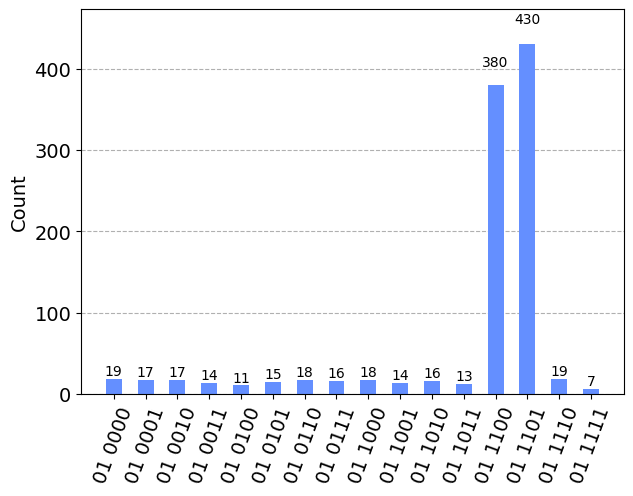

In [9]:
from functions.patterns_utilities import generate_patterns
from qiskit.visualization import plot_histogram

patterns = generate_patterns(4,4)
state, data = QUAM.QuAM(patterns, search="110?")
print(patterns)
print(state)
plot_histogram(data)